# Notebook 3 – Evaluation & Plots

This notebook evaluates the trained MLP pitch regressor model using the test, validation, and training datasets.  
It also generates performance plots (true vs. predicted, residuals, histogram distributions, etc.) and saves them in the `figures/` folder.

---

## **Table of Contents**

1. **Import Libraries & Paths**
   - Load dependencies  
   - Set data/model directories  

2. **Load Dataset**
   - Preview dataframe  
   - Feature selection  
   - Train/Validation/Test split  

3. **Load Scaler & Trained Model**
   - Apply scaling  
   - Predict on all splits  

4. **Evaluation Metrics**
   - MAE  
   - RMSE  
   - R²  
   - Combined metrics table  

5. **Plots**
   - True vs. Predicted (Train/Val/Test)  
   - Residual plots  
   - Error distribution histogram  
   - Save figures to folder  

6. **Summary of Model Performance**
   - General conclusions  
   - Notes for Notebook 4 

---



# **1. Import Libraries & Paths**

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

plt.style.use("seaborn-v0_8-darkgrid")  # optional, just nicer

DATA_PATH   = "../data/region3clean.csv"   # change if your name is different
SCALER_PATH = "../models/standard_scaler.joblib"
MODEL_PATH  = "../models/mlp_pitch_regressor.joblib"  # or *_best.joblib if you used it

FIG_DIR = "../figures"
os.makedirs(FIG_DIR, exist_ok=True)


# **2. Load Dataset**

In [5]:
DATA_PATH = "../data/region3_clean.csv"   # <-- underscore here
df = pd.read_csv(DATA_PATH)
df.head()

,# Date and time,wind_speed,"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,2021-01-11 06:00:00,10.236168,1.224991,8.094797,11.770544,7.1,10.177200,0.872620,8.204220,11.975576,...,46.642320,11.836892,193.188858,15.168448,104.808479,13.539090,13.539090,0.0,45.252784,27.805571
1,2021-01-11 08:10:00,10.186494,1.233780,8.086259,12.148848,7.1,10.066514,0.812497,8.678763,11.538656,...,38.915598,10.477318,161.757111,13.118427,130.882217,11.338036,11.338036,0.0,37.246034,26.998310
2,2021-01-11 09:50:00,10.226459,1.425780,6.840344,12.812271,7.1,10.687045,1.254969,8.621642,13.244870,...,44.213200,27.331589,185.019653,6.171835,76.244621,12.171434,12.171434,0.0,45.804121,20.357001
3,2021-01-11 10:00:00,10.452997,1.175044,8.167192,12.697185,7.1,10.748972,1.083686,8.370090,13.151499,...,50.192635,36.055954,187.254364,8.311114,101.003700,11.973888,11.973888,0.0,38.424668,23.878383
4,2021-01-11 11:30:00,10.478650,1.324442,8.744857,13.281160,7.1,10.486587,1.125512,8.139410,12.913678,...,47.312646,27.054289,186.643051,9.686954,107.519188,12.649140,12.649140,0.0,50.866332,27.062237


# 3. **Load Scaler & Trained Model**

In [6]:
FEATURES = ["wind_speed", "rotor_speed", "power"]
TARGET = "pitch"

X = df[FEATURES].values
y = df[TARGET].values

# Train / Val / Test = 70 / 15 / 15 (same as before)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)

X_train.shape, X_val.shape, X_test.shape


((1041, 3), (223, 3), (224, 3))

In [7]:
scaler = joblib.load(SCALER_PATH)
model  = joblib.load(MODEL_PATH)

X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

y_train_pred = model.predict(X_train_scaled)
y_val_pred   = model.predict(X_val_scaled)
y_test_pred  = model.predict(X_test_scaled)


# 4. **Evaluation Metrics**

In [8]:
def eval_metrics(y_true, y_pred, name=""):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

m_train = eval_metrics(y_train, y_train_pred, "Train")
m_val   = eval_metrics(y_val,   y_val_pred,   "Validation")
m_test  = eval_metrics(y_test,  y_test_pred,  "Test")

metrics_df = pd.DataFrame([m_train, m_val, m_test],
                          index=["Train", "Validation", "Test"])
metrics_df


Train -> MAE: 0.536, RMSE: 0.670, R²: 0.957
Validation -> MAE: 0.550, RMSE: 0.681, R²: 0.953
Test -> MAE: 0.558, RMSE: 0.694, R²: 0.949


,MAE,RMSE,R2
Train,0.536424,0.670312,0.957453
Validation,0.549740,0.681349,0.953171
Test,0.557732,0.693551,0.948806


# 5. **Plots**

In [9]:
def plot_true_vs_pred(y_true, y_pred, name, save=True):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, s=10, alpha=0.4)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2)
    plt.xlabel("True pitch (deg)")
    plt.ylabel("Predicted pitch (deg)")
    plt.title(f"True vs Predicted Pitch — {name}")
    if save:
        path = os.path.join(FIG_DIR, f"true_vs_pred_{name.lower()}.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print("Saved:", path)
    plt.show()


def plot_residuals_hist(y_true, y_pred, name, save=True):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    plt.hist(residuals, bins=40, alpha=0.8)
    plt.xlabel("Residual (true - predicted) [deg]")
    plt.ylabel("Count")
    plt.title(f"Residuals Histogram — {name}")
    if save:
        path = os.path.join(FIG_DIR, f"residuals_hist_{name.lower()}.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print("Saved:", path)
    plt.show()


def plot_residuals_vs_pred(y_true, y_pred, name, save=True):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, s=10, alpha=0.4)
    plt.axhline(0, color="red", linestyle="--", linewidth=2)
    plt.xlabel("Predicted pitch (deg)")
    plt.ylabel("Residual (true - predicted) [deg]")
    plt.title(f"Residuals vs Predicted — {name}")
    if save:
        path = os.path.join(FIG_DIR, f"residuals_vs_pred_{name.lower()}.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print("Saved:", path)
    plt.show()


def plot_time_series_overlay(y_true, y_pred, name, n_points=300, save=True):
    n_points = min(n_points, len(y_true))
    idx = np.arange(n_points)

    plt.figure(figsize=(10, 4))
    plt.plot(idx, y_true[:n_points], label="True pitch")
    plt.plot(idx, y_pred[:n_points], label="Predicted pitch", linestyle="--")
    plt.xlabel("Sample index")
    plt.ylabel("Pitch (deg)")
    plt.title(f"Pitch Time-Series Overlay — {name} (first {n_points} samples)")
    plt.legend()
    if save:
        path = os.path.join(FIG_DIR, f"time_series_{name.lower()}.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print("Saved:", path)
    plt.show()


Saved: ../figures\true_vs_pred_test.png


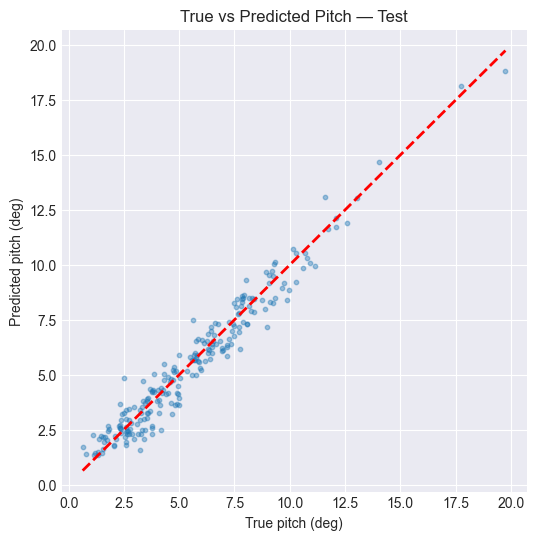

Saved: ../figures\residuals_hist_test.png


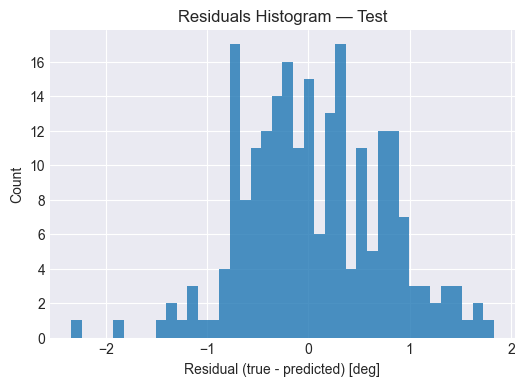

Saved: ../figures\residuals_vs_pred_test.png


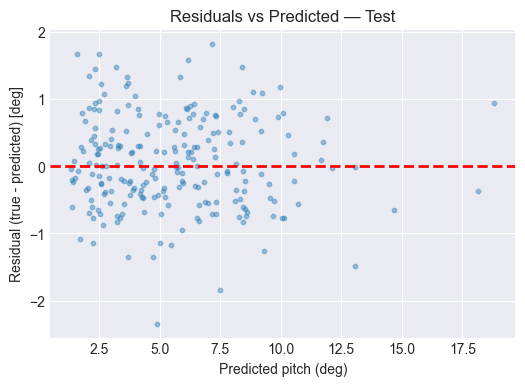

Saved: ../figures\time_series_test.png


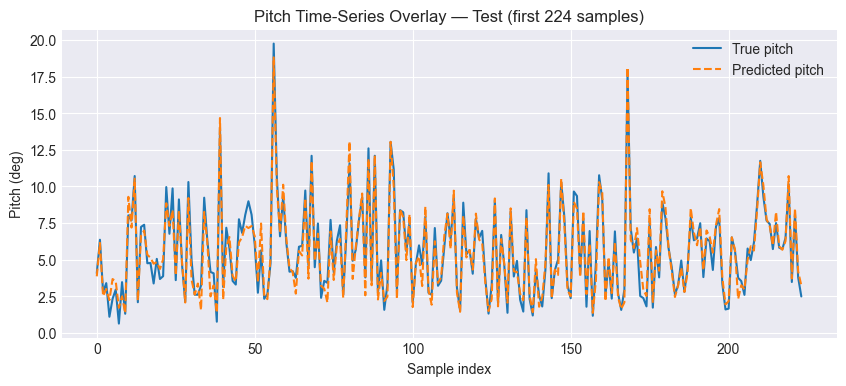

In [10]:
# Scatter: True vs Predicted (Test)
plot_true_vs_pred(y_test, y_test_pred, "Test")

# Residual histogram (Test)
plot_residuals_hist(y_test, y_test_pred, "Test")

# Residuals vs Predicted (Test)
plot_residuals_vs_pred(y_test, y_test_pred, "Test")

# Time-series style overlay (Test)
plot_time_series_overlay(y_test, y_test_pred, "Test", n_points=300)


In [4]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# 1) Load the SAME scaler and model that the API/Docker are using
scaler = joblib.load("../models/standard_scaler.joblib")
model  = joblib.load("../models/mlp_pitch_regressor_best.joblib")

# 2) Load the cleaned Region 3 dataset
df = pd.read_csv("../data/region3_clean.csv")

# 3) Build feature matrix X and target y
X = df[["wind_speed", "rotor_speed", "power"]].values
y = df["pitch"].values

# 4) Apply scaler and model
X_scaled = scaler.transform(X)
y_pred = model.predict(X_scaled)

# 5) Compute metrics
mae = mean_absolute_error(y, y_pred)
r2  = r2_score(y, y_pred)

print("MAE:", mae)
print("R² :", r2)


MAE: 0.5402784747178847
R² : 0.9560760417023781


# 6. **Summary of Model Performance**

In [5]:
import requests
import pandas as pd

# Load the same dataset
df = pd.read_csv("../data/region3_clean.csv")

# Pick one random row
row = df.sample(1, random_state=42).iloc[0]

payload = {
    "wind_speed": float(row["wind_speed"]),
    "rotor_speed": float(row["rotor_speed"]),
    "power": float(row["power"])
}

print("Sending to API:", payload)

res = requests.post("http://localhost:8000/predict", json=payload)
print("API status code:", res.status_code)
print("API response:", res.json())

print("\nTrue pitch from dataset:", float(row["pitch"]))


Sending to API: {'wind_speed': 13.780008840560916, 'rotor_speed': 15.208942517638198, 'power': 2049.6181518554704}
API status code: 200
API response: {'pitch': 10.1133139564562}

True pitch from dataset: 9.343500041961669
